<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Dementia_MY_Scientifi_work_Machine_learning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# importing necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)


Mounted at /content/gdrive


In [94]:
#Read and view the data set
data = pd.read_csv('/content/gdrive/MyDrive/Datasets/df_drop.csv')
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [95]:
list(data.columns)

['Subject ID',
 'MRI ID',
 'Group',
 'Visit',
 'MR Delay',
 'M/F',
 'Hand',
 'Age',
 'EDUC',
 'SES',
 'MMSE',
 'CDR',
 'eTIV',
 'nWBV',
 'ASF']

In [96]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.884181,601.353107,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780
std,0.925330,640.596081,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250
50%,2.000000,559.500000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500
75%,2.000000,882.500000,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [97]:
#checking the missing data
data.isnull().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES           False
MMSE          False
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [98]:
#checking for the number of missing data per column
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [99]:
#confirming for the number of missing values
data.isnull().sum().sum()

0

In [100]:
#checking for the row per column before data cleaning
data.shape

(354, 15)

array([[<Axes: title={'center': 'Visit'}>,
        <Axes: title={'center': 'MR Delay'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EDUC'}>,
        <Axes: title={'center': 'SES'}>,
        <Axes: title={'center': 'MMSE'}>],
       [<Axes: title={'center': 'CDR'}>,
        <Axes: title={'center': 'eTIV'}>,
        <Axes: title={'center': 'nWBV'}>],
       [<Axes: title={'center': 'ASF'}>, <Axes: >, <Axes: >]],
      dtype=object)

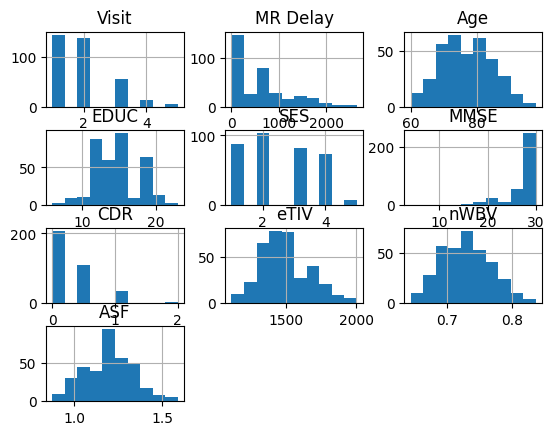

In [101]:
# general visualization using all the column
data.hist()

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

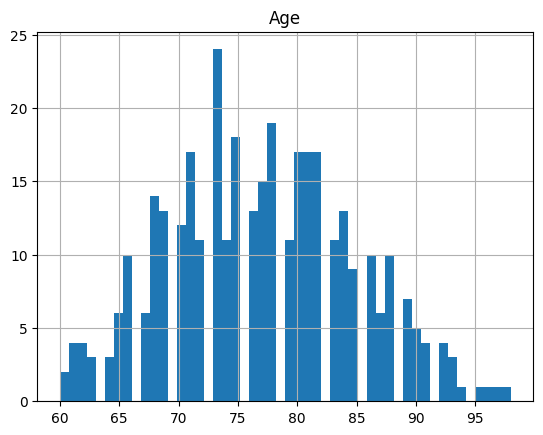

In [102]:
data.hist(column='Age' , bins=50)

<ipython-input-103-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

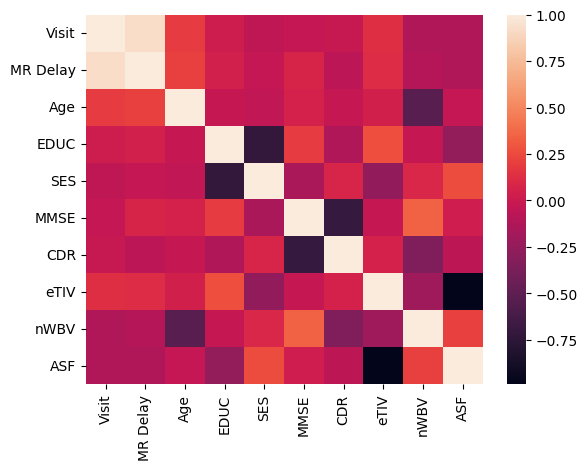

In [103]:
sns.heatmap(data.corr())

<ipython-input-104-0f67f26089a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age , kde=True)


<Axes: xlabel='Age', ylabel='Density'>

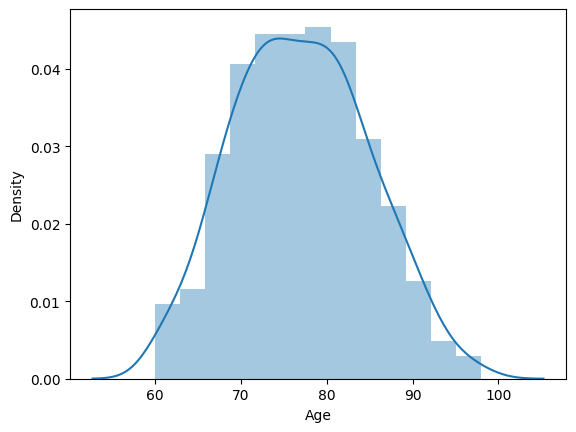

In [104]:
sns.distplot(data.Age , kde=True)

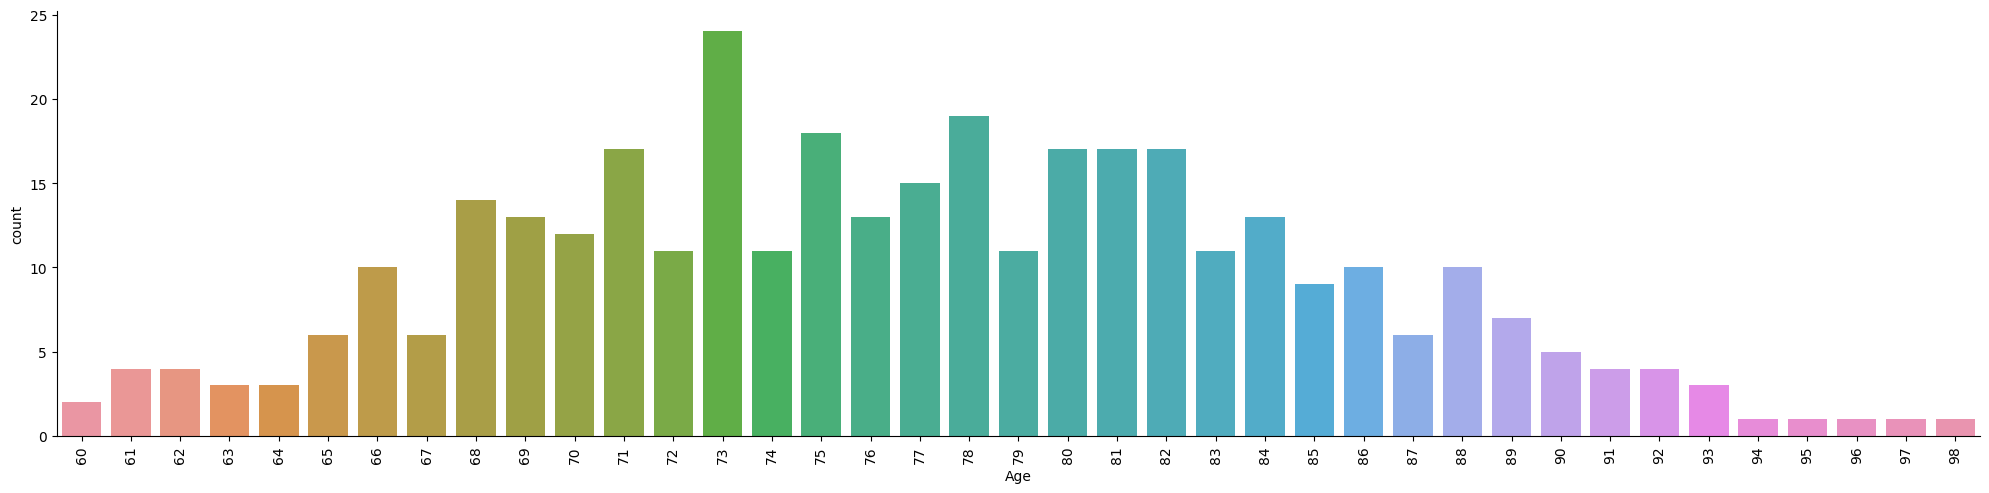

In [105]:
ax = sns.catplot(data = data, x="Age", kind="count", aspect = 4); plt.xticks(rotation=90);

<Axes: >

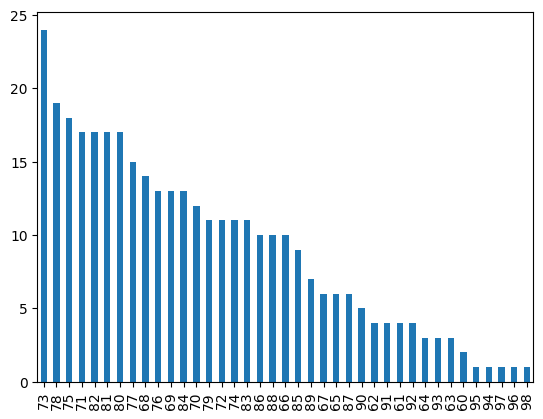

In [107]:
data['Age'].value_counts().plot(kind='bar')

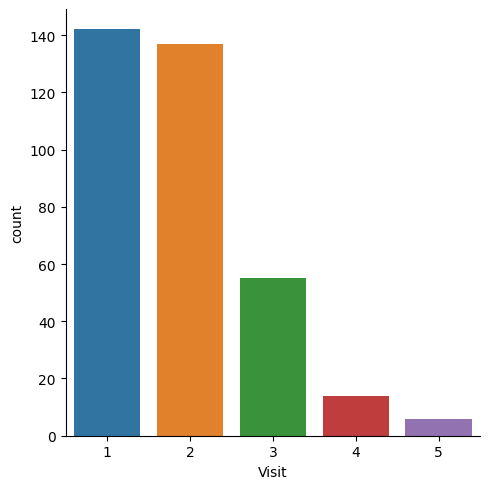

In [108]:
ax = sns.catplot(data = data, x="Visit", kind="count", aspect = 1);

<Axes: >

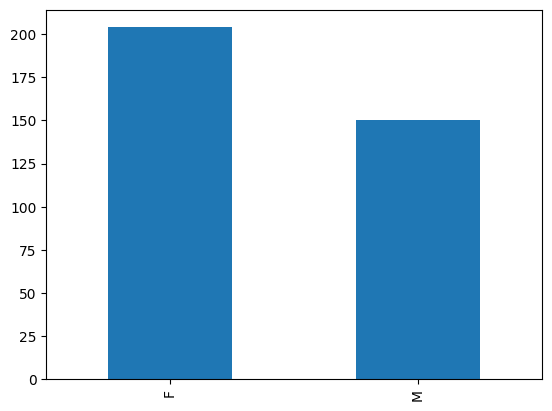

In [109]:
data['M/F'].value_counts().plot(kind='bar')

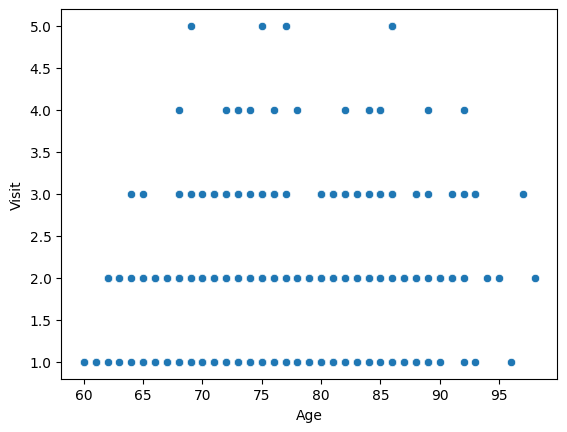

In [111]:
import itertools
from pandas.io.pytables import Any
ax = sns.scatterplot(x="Age", y="Visit", data = data)

<Axes: xlabel='Group', ylabel='count'>

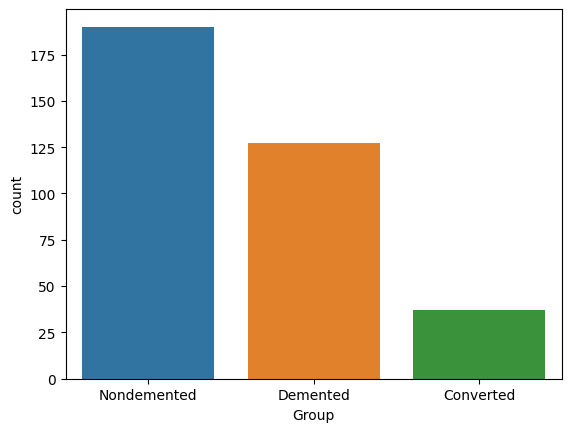

In [112]:
sns.countplot(x = data['Group'])

In [113]:
data.Group.value_counts()

Nondemented    190
Demented       127
Converted       37
Name: Group, dtype: int64

In [118]:
# converted are non dementia at the first visit but dementia at the second visit
# we have 14 cases of non dementia at the first visit
data.loc[data.Group == 'Converted']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
27,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
28,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
29,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
30,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
31,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
32,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
51,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
52,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
53,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
75,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362


In [119]:
data.loc[data.Group == 'Demented']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
9,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205
10,OAS2_0009,OAS2_0009_MR2,Demented,2,576,M,R,69,12,2.0,24.0,0.5,1480,0.791,1.186
11,OAS2_0010,OAS2_0010_MR1,Demented,1,0,F,R,66,12,3.0,30.0,0.5,1447,0.769,1.213
12,OAS2_0010,OAS2_0010_MR2,Demented,2,854,F,R,68,12,3.0,29.0,0.5,1482,0.752,1.184
19,OAS2_0014,OAS2_0014_MR1,Demented,1,0,M,R,76,16,3.0,21.0,0.5,1602,0.697,1.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
347,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
348,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
349,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037


In [120]:
data.loc[data.Group == 'Nondemented']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165
345,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162
351,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
352,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


<ipython-input-121-9d7566ec375c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr ()


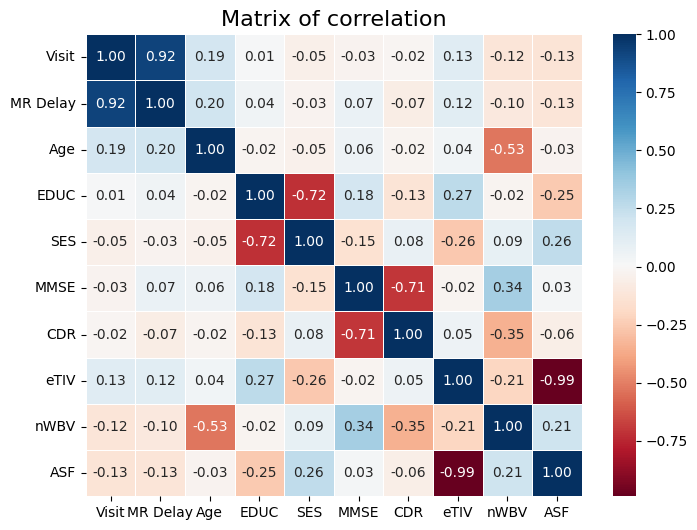

In [121]:
corr = data.corr ()
plt.figure ( figsize= (8,6) )
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.7, cbar = True, cmap='RdBu' )
plt.title ( 'Matrix of correlation', size = 16)
plt.show ()

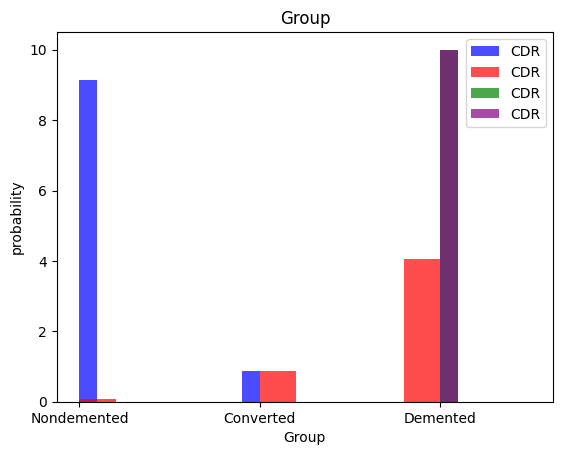

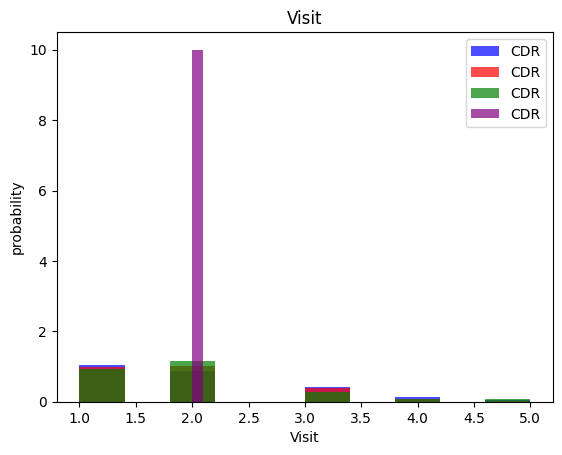

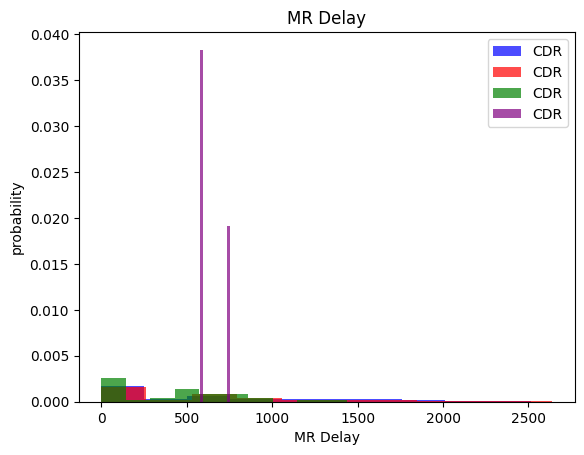

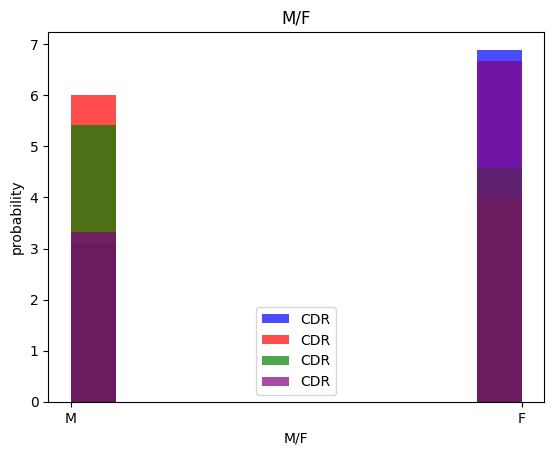

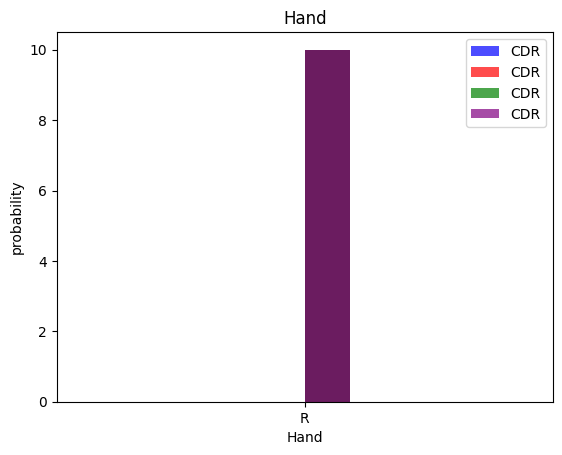

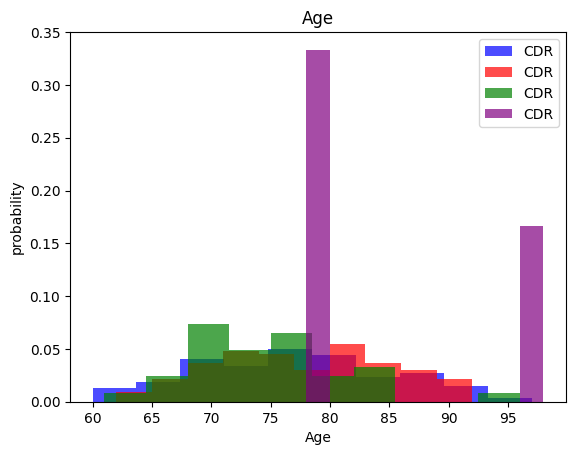

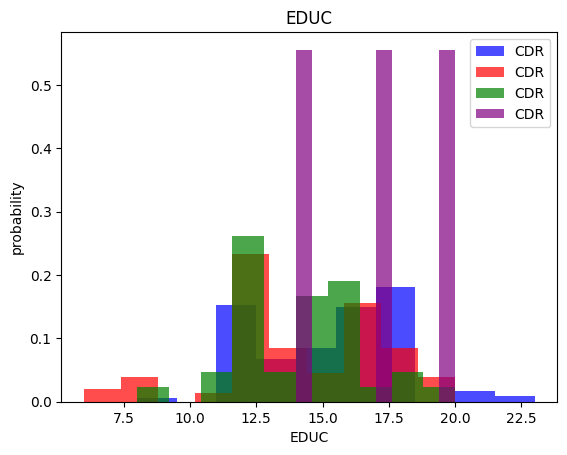

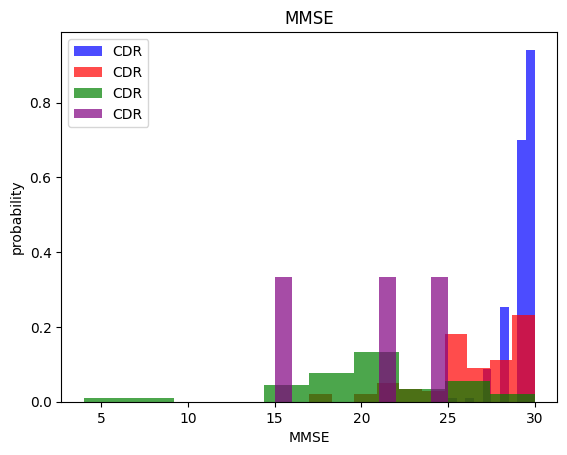

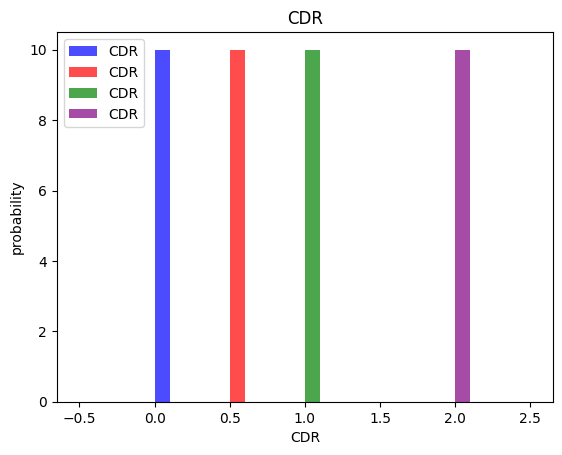

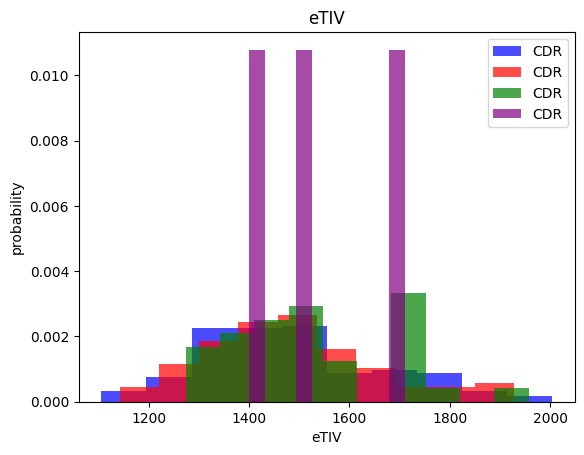

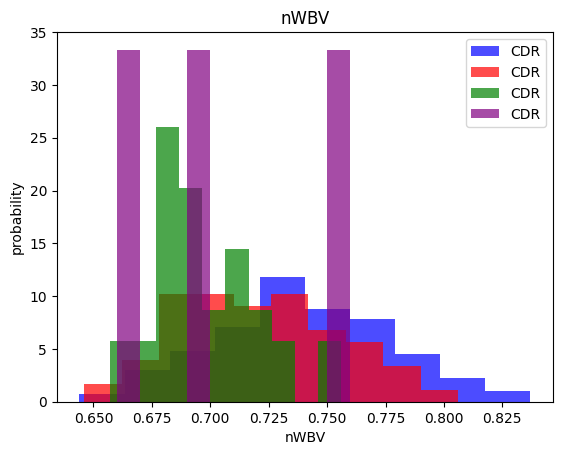

In [122]:
# Drop all the irrelavant colum. ploting hist. for the respective columns against the target variable "CDR"
cols = ["Group","Visit","MR Delay","M/F","Hand","Age","EDUC","MMSE","CDR","eTIV","nWBV","ASF"]
for label in cols[:-1]:
    plt.hist(data[data["CDR"]==0.0][label], color= 'blue', label= 'CDR',alpha= 0.7,density= True)
    plt.hist(data[data["CDR"]==0.5][label], color= 'red', label= 'CDR',alpha=0.7,density= True)
    plt.hist(data[data["CDR"]==1.0][label], color= 'green', label= 'CDR',alpha= 0.7,density= True)
    plt.hist(data[data["CDR"]==2.0][label], color= 'purple', label= 'CDR',alpha= 0.7,density= True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [47]:
# importing the necesarry libraries for the machine learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression

In [123]:
df = data
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [124]:
# Train, validation  and test datasets
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [125]:
print(len(train[train["CDR"]==0.0])) #no dementia
print(len(train[train["CDR"]==1.0])) #dementia
print(len(train[train["CDR"]==1.5]))  #dementia
print(len(train[train["CDR"]==2.0]))  #dementia

129
17
0
3


In [126]:
# Split dataset into features and target variable
X = data.drop(['CDR', 'Subject ID', 'MRI ID'], axis=1)
y = data['CDR']




In [127]:
X

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,2004,0.681,0.876
2,Nondemented,1,0,F,R,88,18,3.0,28.0,1215,0.710,1.444
3,Nondemented,2,538,F,R,90,18,3.0,27.0,1200,0.718,1.462
4,Nondemented,1,0,M,R,80,12,4.0,28.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...
349,Demented,2,842,M,R,82,16,1.0,28.0,1693,0.694,1.037
350,Demented,3,2297,M,R,86,16,1.0,26.0,1688,0.675,1.040
351,Nondemented,1,0,F,R,61,13,2.0,30.0,1319,0.801,1.331
352,Nondemented,2,763,F,R,63,13,2.0,30.0,1327,0.796,1.323


In [128]:
#converting the string variable to float
categorical_features = ["Group", "M/F", "Hand"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 1.987e+03, 6.960e-01,
        8.830e-01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.004e+03, 6.810e-01,
        8.760e-01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.215e+03, 7.100e-01,
        1.444e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.319e+03, 8.010e-01,
        1.331e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.327e+03, 7.960e-01,
        1.323e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.333e+03, 8.010e-01,
        1.317e+00]])

In [129]:
#visualizing transformed_X dataset
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,87.0,14.0,2.0,27.0,1987.0,0.696,0.883
1,0.0,0.0,1.0,0.0,1.0,1.0,2.0,457.0,88.0,14.0,2.0,30.0,2004.0,0.681,0.876
2,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,88.0,18.0,3.0,28.0,1215.0,0.710,1.444
3,0.0,0.0,1.0,1.0,0.0,1.0,2.0,538.0,90.0,18.0,3.0,27.0,1200.0,0.718,1.462
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,80.0,12.0,4.0,28.0,1689.0,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.0,1.0,0.0,0.0,1.0,1.0,2.0,842.0,82.0,16.0,1.0,28.0,1693.0,0.694,1.037
350,0.0,1.0,0.0,0.0,1.0,1.0,3.0,2297.0,86.0,16.0,1.0,26.0,1688.0,0.675,1.040
351,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,61.0,13.0,2.0,30.0,1319.0,0.801,1.331
352,0.0,0.0,1.0,1.0,0.0,1.0,2.0,763.0,63.0,13.0,2.0,30.0,1327.0,0.796,1.323


In [130]:
dummies =  pd.get_dummies(df[[ "Group", "M/F", "Hand"]])
dummies

,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,Hand_R
0,0,0,1,0,1,1
1,0,0,1,0,1,1
2,0,0,1,1,0,1
3,0,0,1,1,0,1
4,0,0,1,0,1,1
...,...,...,...,...,...,...
349,0,1,0,0,1,1
350,0,1,0,0,1,1
351,0,0,1,1,0,1
352,0,0,1,1,0,1


In [131]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

In [132]:
model =  RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
y_pred = model.predict(X_test)
y_pred

array([0.   , 0.   , 0.395, 0.   , 0.   , 0.52 , 0.   , 0.   , 0.   ,
       0.095, 0.72 , 0.52 , 0.63 , 0.995, 0.515, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.48 , 0.   , 0.68 , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.53 , 0.475, 0.51 , 0.775, 0.58 , 0.   , 0.545,
       0.74 , 0.   , 1.175, 0.075, 0.735, 0.02 , 0.   , 0.56 , 0.   ,
       0.105, 0.625, 0.   , 0.73 , 0.96 , 0.57 , 0.   , 0.   , 0.   ,
       0.   , 0.775, 0.04 , 0.   , 0.35 , 0.5  , 0.   , 0.945, 0.015,
       0.41 , 0.575, 0.75 , 0.   , 0.   , 0.   , 0.995, 0.   ])

In [136]:
model.score(X_test, y_test)

0.8208673947577442

In [137]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [138]:
# Generate the report
report = f"Mean Squared Error (MSE): {mse}\nMean Absolute Error (MAE): {mae}"

In [139]:
print(report)

Mean Squared Error (MSE): 0.0223693661971831
Mean Absolute Error (MAE): 0.07795774647887324
